<a href="https://colab.research.google.com/github/Ganesh-Esc/ML-Model-Simple-Linear-Regression/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression

Import needed packages
For this lab, you will need to have the following packages:

1.NumPy
2.Matplotlib
3.Pandas
4.Scikit-learn

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the Data

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df=pd.read_csv(url)

Verify the sample

In [5]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
459,2014,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,4.3,6,A6,E,20.0,15.1,17.8,16,285
32,2014,AUDI,A8 TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,10.0,6.4,8.4,34,227
867,2014,PORSCHE,911 CARRERA 4,MINICOMPACT,3.4,6,AM7,Z,11.8,8.5,10.3,27,237
166,2014,CADILLAC,CTS SEDAN AWD,MID-SIZE,2.0,4,AS6,Z,12.6,8.5,10.8,26,248
12,2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359


Understand the Data


FuelConsumption.csv:
You will use a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source.

1.MODEL YEAR e.g. 2014
2.MAKE e.g. VOLVO
3.MODEL e.g. S60 AWD
4.VEHICLE CLASS e.g. COMPACT
5.ENGINE SIZE e.g. 3.0
6.CYLINDERS e.g 6
7.TRANSMISSION e.g. AS6
8.FUEL TYPE e.g. Z
9.FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
10.FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
11.FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
12.FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
13.CO2 EMISSIONS (g/km) e.g. 182   
Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.

Explore the Data

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select Features

Select a few features that might be a indicative of CO2 Emmission

In [8]:
bdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
bdf=df.sample(9)

Visualise the  features

consider the hhistograms

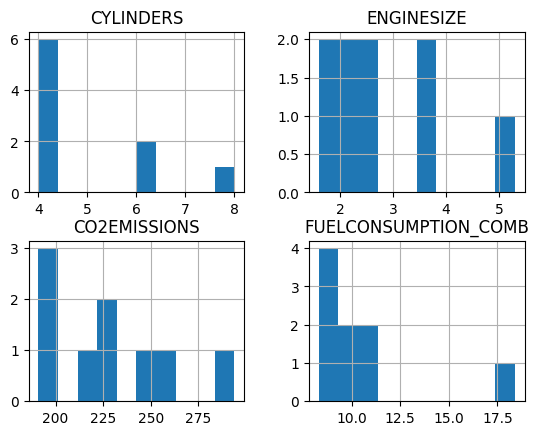

In [31]:
vis=bdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vis.hist()
plt.show()

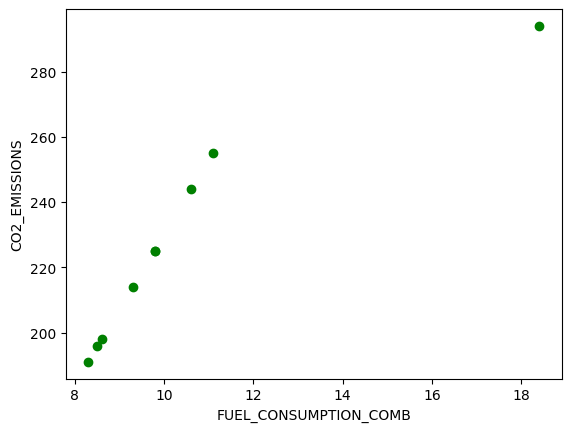

In [32]:
plt.scatter(bdf.FUELCONSUMPTION_COMB,bdf.CO2EMISSIONS,color='green')
plt.xlabel('FUEL_CONSUMPTION_COMB')
plt.ylabel('CO2_EMISSIONS')
plt.show()

Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.



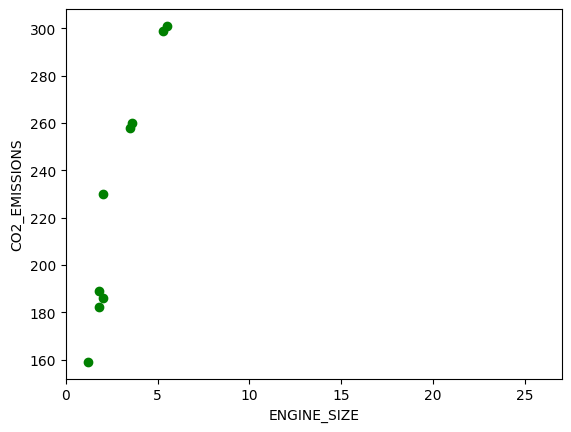

In [13]:
plt.scatter(bdf.ENGINESIZE,bdf.CO2EMISSIONS,color='green')
plt.xlabel('ENGINE_SIZE')
plt.ylabel('CO2_EMISSIONS')
plt.xlim(0,27)
plt.show()

Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.

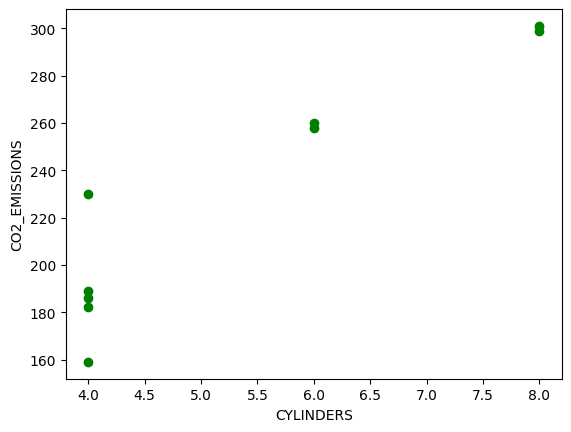

In [14]:
plt.scatter(bdf.CYLINDERS,bdf.CO2EMISSIONS,color='green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2_EMISSIONS')
plt.show()

Extract the input features and Labels from the Dataset

Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset

In [15]:
X=bdf.ENGINESIZE.to_numpy()
y=bdf.CO2EMISSIONS.to_numpy()

Create train and test datasets

split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing.

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

The outputs are one-dimensional NumPy arrays or vectors.

In [17]:
type(X_train),np.shape(X_train),type(y_train),np.shape(y_train)

(numpy.ndarray, (7,), numpy.ndarray, (7,))

Build a Simple Linear Regression Model

In [27]:
from sklearn import linear_model
#create a model object
regr=linear_model.LinearRegression()
#train the model on the training data
#X_train is a 1-D array but sklearn model expects a 2-D array as input for training data with shape(n_observations,n_features)
#so we need to reshape it.We can let it infer the number of observations using '-1'
regr.fit(X_train.reshape(-1,1),y_train)
#print the coefficients
print('Coefficients:',regr.coef_[0])
print('Intercept:',regr.intercept_)

Coefficients: 33.223391812865515
Intercept: 130.99228070175434


Here, Coefficient and Intercept are the regression parameters determined by the model.
They define the slope and intercept of the 'best-fit' line to the training data.





Visualize model outputs

You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.



Text(0, 0.5, 'CO2_EMISSIONS')

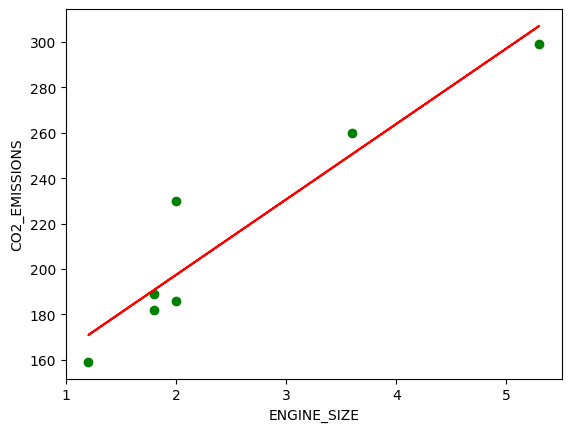

In [23]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,regr.coef_[0]*X_train+regr.intercept_,color='red')
plt.xlabel('ENGINE_SIZE')
plt.ylabel('CO2_EMISSIONS')

Model Evaluation

You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:



Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.



R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
#Use the predict method to take the test predictions
y_test_=regr.predict(X_test.reshape(-1,1))
print('Mean Absolute Error:%.2f',mean_absolute_error(y_test_,y_test))
print('Mean Squared Error:%.2f',mean_squared_error(y_test_,y_test))
print('Root Mean Squared Error:%.2f',root_mean_squared_error(y_test_,y_test))
print('R2 Score:%.2f',r2_score(y_test_,y_test))

Mean Absolute Error:%.2f 0.0
Mean Squared Error:%.2f 0.0
Root Mean Squared Error:%.2f 0.0
R2 Score:%.2f 1.0


Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.

Text(0, 0.5, 'CO2_EMISSIONS')

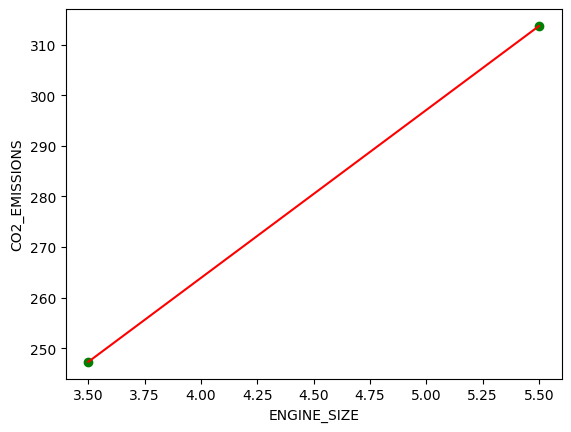

In [30]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,regr.coef_[0]*X_test+regr.intercept_,color='red')
plt.xlabel('ENGINE_SIZE')
plt.ylabel('CO2_EMISSIONS')